# Домашнее задание №2
Потренируем навыки, полученные на практическом занятии.

Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)

Переменная, которую надо предсказать - ’MEDV’.

Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])

Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

Импортируем необходимые библиотеки и получим данные в переменную data, выведем первые 5 строк датасета:

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Получим информацию о содержимом датасета и опишем ее:

In [2]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Будем рассматривать набор данных о ценах на дома в Бостоне. Количество атрибутов (столбцов) 13, количество строк 506. Атрибут MEDV является целевым. 

Информация об атрибутах:
- CRIM: Уровень преступности на душу населения.
- ZN: доля земли под жилую застройку зонирована на участки площадью более 25 000 кв. футов.
- INDUS: доля акров, не относящихся к розничной торговле, на город.
- CHAS: = 1, если участок ограничивает реку; 0 в противном случае.
- NOX: Концентрация оксидов азота (частей на 10 миллионов).
- RM: Среднее количество комнат в жилом доме.
- AGE: доля жилых домов, построенных до 1940 г., занимаемых владельцами.
- DIS: взвешенные расстояния до пяти бостонских центров занятости.
- RAD: Индекс доступности радиальных автомобильных дорог.
- TAX: Ставка налога на имущество в размере полной стоимости за 10 000 долларов США.
- PTRATIO: Соотношение учеников и учителей по городам.
- B: 1000 (Bk - 0,63) ^ 2, где Bk - доля черных по городам.
- LSTAT: % низкий статус населения.
- MEDV: Средняя стоимость частных домов.

Нет пропусков в данных.

Получим сводку о данных (пропуски, кол-во данных, типы данных):

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Все значения в таблице количественные. Пропусков в данных нет.

Выведем отсновные статистики по датасету (так как все значения в таблице количественные, они будут считаться по каждому столбцу):

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Видим выбросы в данных, например, столбец CRIM, 75 % значений лежит до значения 3.7, а максимальное значение почти 89, тоже самое в ZN. Стобнц CHAS принимает значения 0 или 1, причем, чаще встречается 0, то есть участки в  большинстве не около реки. Цены находятся в промежутке от 5 до 50, с средним значением в 22,5, 75 % данных находятся до 25, можно предположить, что это нормальное распределение.

Построим некоторые визуализации.

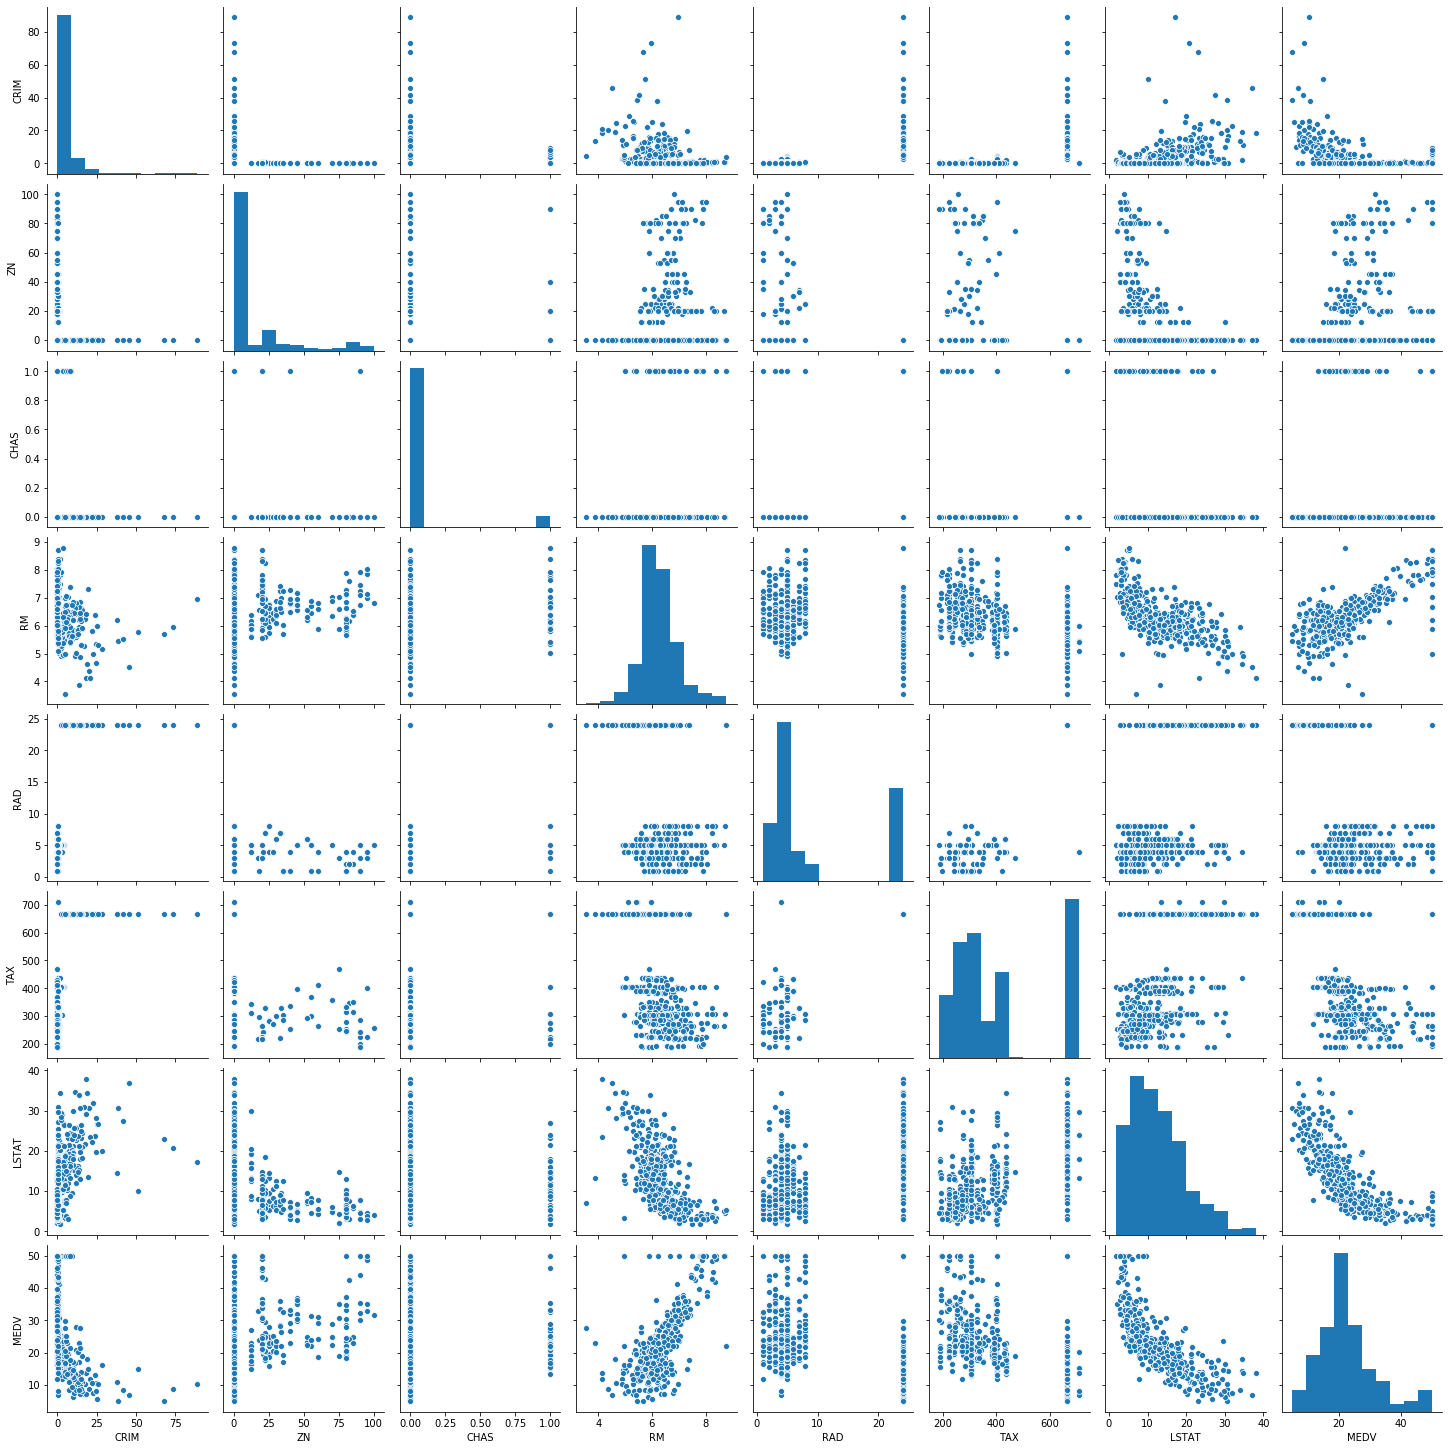

In [5]:
sns.pairplot(data, vars=['CRIM', 'ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'LSTAT', 'MEDV'], kind="scatter")

Целейвой столбец имеет нормальное распределение.

Построим и визуалиируем матрицу корреляций:

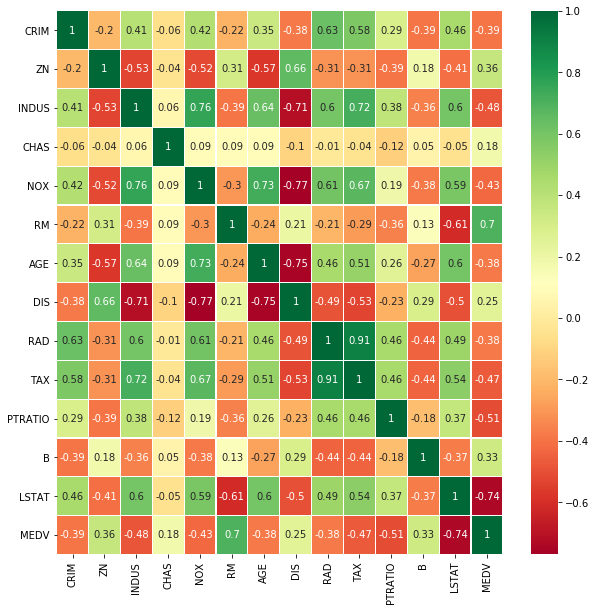

In [8]:
corr_matrix = np.round_(data.corr(), decimals=2)
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Коэффициент корреляции показывает силу линейной зависимости между двумя переменными. Он изменяется от -1 до 1. Близость к -1 говорит об отрицательной линейной зависимости, близость к 1 – о положительной. По матрице корреляций видно, что MEDV имеет сильную прямую взаимосвязь с RM с коэффициентом 0.7, то есть чем больше комнат, чем дороже стоимость, и обратно от LSTAT, то есть чем выше % населения с низким уровнем жезни, тем ниже стоимость. Кроме того,стоит отметить сильную прямую взаимосвязь AGE и NOX и обратную взаимосвязь NOX и DIS, AGE и DIS, INDUS и DIS.

In [9]:
#Построим модель линейной регрессии от всех атрибутов
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


X = data.drop('MEDV', axis = 1)
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))
pred_values = reg.predict(data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Bias: 36.459488385090005
Error: 3.270862810900314


In [10]:
#Попробуем взять только 2 самых коррелирующих атрибута
X = data[[ 'RM',  'LSTAT']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))
pred_values = reg.predict(data[['RM', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 5.09478798 -0.64235833]
Bias: -1.3582728118744818
Error: 3.952580067119271


Ошибка стала больше почти на 0.7, много информации теряется, поэтому попробуем сократить количество атрибутов, и посмотрим как будет меняться ошибка

In [11]:
# убрали INDUS, AGE, NOX так как они все зависят от DIS, поэтому оставим только DIS
X = data[['CRIM', 'ZN',  'CHAS', 'RM',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))
pred_values = reg.predict(data[['CRIM', 'ZN',  'CHAS', 'RM',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.09649731  0.05281081  2.3802989   3.94059598 -1.05476566  0.28259531
 -0.01572265 -0.75651996  0.01023922 -0.57069861]
Bias: 22.605364628079137
Error: 3.3329970513729097


In [12]:
# убрали CHAS так как очень меленкая корреляция с MEDV
X = data[['CRIM', 'ZN',  'RM',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B','LSTAT']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))
pred_values = reg.predict(data[['CRIM', 'ZN',   'RM',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.10201755  0.05240005  3.97214867 -1.10433046  0.29740966 -0.0163311
 -0.79338583  0.01058257 -0.5733751 ]
Bias: 23.483130604889105
Error: 3.345879240005253


In [15]:
# убрали CRIM так как в нем были выбросы
X = data[['ZN',  'RM',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B','LSTAT']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))
pred_values = reg.predict(data[['ZN',  'RM',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B','LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y))) 

Weights: [ 0.04813701  3.99686375 -1.05959328  0.24155775 -0.01585552 -0.794392
  0.0115381  -0.59530412]
Bias: 23.132256905874677
Error: 3.3628897803326807


Если дальше убирать атрибуты, то ошика увеличивается в среднем на 0.04, а до этого на 0.01. Поэтому я думаю, что набор атрибутов ZN',  'RM',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B','LSTAT' является оптимальным, потому что по нему мы можем предсказать MEDV с ошибкай практически равной, если бы мы брали все имеющиеся атрибуты, при этом нам нужно меньше тратить памяти на данные. Стоит отметить, что ошибка 3 с небольшим для данных с средним значением в 22, является досточно большой, я думаю, есть какое то решение, по которому мы можем улучшить качество модели, например создав новый атрибут.  К сожалению, получить новый атрибут путем перемножения старых, или другого их соединения не получилось, ошибка только увеличивалась.